In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Carga de datos
file_path = 'E:/Bootcamp/iris/Iris.csv'  
data = pd.read_csv(file_path)

# Seleccionar las columnas relevantes
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
species = data["Species"]




Valores nulos por columna:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Estadísticas descriptivas:
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


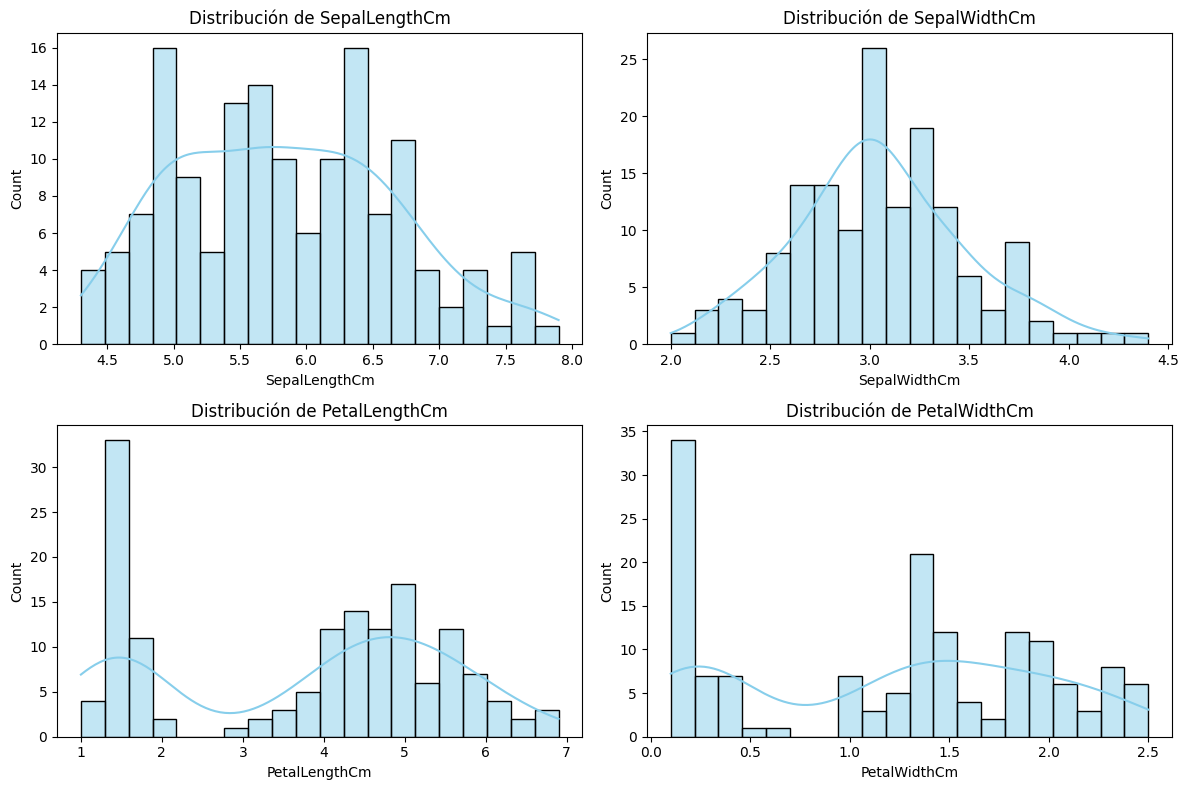

In [2]:
# 2. Exploración de datos
# Verificar valores nulos
print("Valores nulos por columna:\n", data.isnull().sum())

# Estadísticas descriptivas iniciales
print("\nEstadísticas descriptivas:\n", data[features].describe())

# Distribución inicial de las características
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribución de {feature}")
plt.tight_layout()
plt.show()



In [3]:
# 3. Normalización de los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data[features])


In [4]:
# 4. Aplicación de PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data)

# Porcentaje de varianza explicada
explained_variance = pca.explained_variance_ratio_
print("\nPorcentaje de varianza explicada por los dos primeros componentes principales:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")


Porcentaje de varianza explicada por los dos primeros componentes principales:
Componente 1: 72.77%
Componente 2: 23.03%


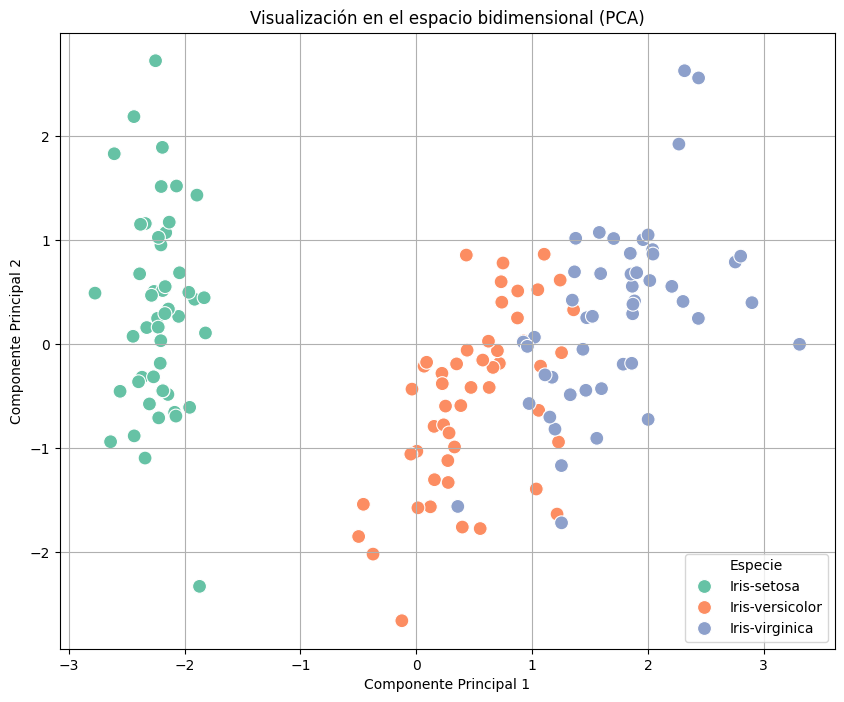

In [5]:
# 5. Visualización de los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=["PC1", "PC2"])
pca_df["Species"] = species

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Species",
    palette="Set2",
    s=100
)
plt.title("Visualización en el espacio bidimensional (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Especie")
plt.grid(True)
plt.show()

In [6]:
# 6. Interpretación de los coeficientes
print("\nCoeficientes de los dos primeros componentes principales:")
for i, component in enumerate(pca.components_[:2], 1):
    print(f"Componente {i}:")
    for feature, coef in zip(features, component):
        print(f"  {feature}: {coef:.4f}")


Coeficientes de los dos primeros componentes principales:
Componente 1:
  SepalLengthCm: 0.5224
  SepalWidthCm: -0.2634
  PetalLengthCm: 0.5813
  PetalWidthCm: 0.5656
Componente 2:
  SepalLengthCm: 0.3723
  SepalWidthCm: 0.9256
  PetalLengthCm: 0.0211
  PetalWidthCm: 0.0654
